<a href="https://colab.research.google.com/github/marsbroshok/face-verification-biometrics/blob/master/Face_Biometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configure Colab for FastAI

In [2]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   1807      0 --:--:-- --:--:-- --:--:--  1802
    100% |████████████████████████████████| 5.7MB 6.5MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 578.2MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62042000 @  0x7f176115b2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
Cloning into 'course-v3'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10

# Setup Colab environment 

In [0]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive, files

In [5]:
drive.mount('gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive


In [6]:
save_dir = Path("/content/gdrive/My Drive/Colab Notebooks/FastAI/my_saves")
models_dir = save_dir.joinpath('models')
# models_dir.mkdir(exist_ok=True)
save_dir.ls()

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/FastAI/my_saves/models')]

In [0]:
# Set all random seed to the same value to obtain reproducible results
manual_seed = 42
random.seed(manual_seed)
np.random.seed(manual_seed)
torch.manual_seed(manual_seed)
torch.cuda.manual_seed_all(manual_seed)
torch.backends.cudnn.deterministic = True

In [0]:
vggface2_test_url = "https://storage.googleapis.com/cv-datasets/other/vggface2/vggface2_test"  # we removed .tgz extention for fastai tools
vggface2_train_url = "https://storage.googleapis.com/cv-datasets/other/vggface2/vggface2_train" #.tgz

In [0]:
vggface_root = Path('/content/data/vggface2')
vggface_root.mkdir(exist_ok=True)

In [39]:
# Images
path_test = untar_data(url=vggface2_test_url, dest=vggface_root.joinpath('test')); path_test

PosixPath('/content/data/vggface2/test')

In [40]:
path_train = untar_data(vggface2_train_url, dest=vggface_root.joinpath('train')); path_train

PosixPath('/content/data/vggface2/train')

In [0]:
# tarfile.open('/content/data/vggface2_train.tgz').extractall('data/vggface2')

In [0]:
# tarfile.open('/content/data/vggface2_test.tgz').extractall('data/vggface2')

In [41]:
!ls /content/data/vggface2/ -lh

total 228K
drwxrwxr-x  502 1001 1001  12K Oct 13  2017 test
drwxrwxr-x 8633 1001 1001 216K Oct 12  2017 train


In [0]:
!mkdir -p /content/data/vggface2_sample /content/data/vggface2_sample/train /content/data/vggface2_sample/test
!cp -r /content/data/vggface2/train/n00000* /content/data/vggface2_sample/train
!cp -r /content/data/vggface2/test/n00000* /content/data/vggface2_sample/test

In [43]:
!ls /content/data/vggface2_sample/**

/content/data/vggface2_sample/test:
n000001  n000009

/content/data/vggface2_sample/train:
n000002  n000003  n000004  n000005  n000006  n000007  n000008


In [44]:
bs = 128
# tfms = get_transforms(xtra_tfms=zoom_crop(scale=2.2))
tfms = get_transforms()

tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is

In [0]:
data = ImageDataBunch.from_folder('/content/data/vggface2/', ds_tfms=tfms, size=160, bs=bs, valid_pct=0.1)

In [46]:
data.train_ds, data.valid_ds

(DatasetTfm(ImageClassificationDataset of len 2827930),
 DatasetTfm(ImageClassificationDataset of len 313960))

In [47]:
data.train_ds.ds.c, data.valid_ds.ds.c

(8631, 8631)

In [48]:
data.normalize(imagenet_stats)

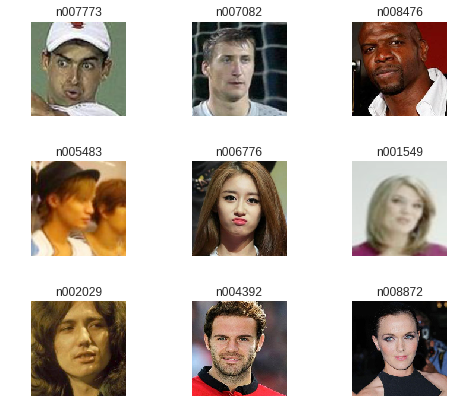

In [49]:
data.show_batch(rows=3, figsize=(7, 6))

In [0]:
@dataclass
class SaveModel(TrackerCallback):
    "A `LearnerCallback` that saves the model when monitored quantity is best."
    every:str='improvement'
    name:str='bestmodel'
    def __post_init__(self):
        if self.every not in ['improvement', 'epoch']:
            warn(f'SaveModel every {every} is invalid, falling back to "improvement".')
            self.every = 'improvement'
        super().__post_init__()
   
    def on_epoch_end(self, epoch, **kwargs:Any)->None:
        if self.every=="epoch": learn.save(f'{self.name}_{epoch}')
        else: #every="improvement"
            current = self.get_monitor_value()
            if current is not None and self.operator(current, self.best):
                self.best = current
                learn.save(f'{self.name}')
    
    def on_train_end(self, **kwargs):
        if self.every=="improvement": learn.load(f'{self.name}')

In [51]:
# Let's start training!
learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir=models_dir, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 48163251.75it/s]


In [0]:
learn.callback_fns.append(partial(SaveModel, every='epoch'))
# learn.callback_fns.append(partial(SaveModel, every='improvement'))

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate


In [79]:
!ls -lh "$models_dir"

total 224M
-rw------- 1 root root 45M Oct 30 20:57 bestmodel_1.pth
-rw------- 1 root root 45M Oct 30 20:58 bestmodel_2.pth
-rw------- 1 root root 45M Oct 30 20:58 bestmodel_3.pth
-rw------- 1 root root 45M Oct 30 20:59 bestmodel_4.pth
-rw------- 1 root root 45M Oct 30 20:59 bestmodel_5.pth


# Labelled Faces in the Wild
LFW dataset consists of XXX **description from website here**
We would like to test face biometric verification with deep learning tools and limited datasets (LFW has 13K images, compare to modern deep learning datasets with millions of images CelebFaces, VGGFace etc).

To explore this dataset we will test influence at the final accuracy of:
-  backbones for transfer learning:
  - Resnet18
  - Resnet34
  - Resnet50
-  ways of image preprocessing:
  - original images from LFW
  - central crop to keep only large part of the face
- image size:
  - 160x160
  - 224x224
  - 320x320
  
With every configuration we will report accuracy score for trained model on our custom validation set.
 
**TODO:** Also communicate accuracy on the LFW official validation dataset. But to do so you need to:
- extract embedding vector from the last layer before classification (size of 512 usually)
- calculate these vectore (face templates in biometrics terms) for each sample in validation sets
- find distance and convert it to Accepted / Rejected binary decision per pair fro val set
- calculate Accuracy (need to do it!) and probabily other metrcis like FAR/FRR/EER

In [0]:
# Let's download LFW data (we are using deep funelled images)
lfw_url = 'http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled'
pairs_dev_train_url = 'http://vis-www.cs.umass.edu/lfw/pairsDevTrain.txt'
pairs_dev_test_url = 'http://vis-www.cs.umass.edu/lfw/pairsDevTest.txt'
people_dev_train_url = 'http://vis-www.cs.umass.edu/lfw/peopleDevTrain.txt'
people_dev_test_url = 'http://vis-www.cs.umass.edu/lfw/peopleDevTest.txt'
pairs_val_url = 'http://vis-www.cs.umass.edu/lfw/pairs.txt'
people_val_url = 'http://vis-www.cs.umass.edu/lfw/people.txt'
urls = [pairs_dev_train_url, pairs_dev_test_url, people_dev_train_url, people_dev_test_url, pairs_val_url, people_val_url]

In [0]:
# Annotation files
for url in urls: 
  !wget $url
!mv *.txt data/

In [10]:
# Images
path = untar_data(lfw_url); path

PosixPath('/root/.fastai/data/lfw-deepfunneled')

Let's divide dataset into train and validation sets. 
We would like to have at least one sample for the same person in both train and validation datasets.
To do so we first filter only people with 2 and more images, and then we'll prepare lists of files for train and validation sets.
Then we will organize these files into imagenet)like structure with `train` and `valid` directories.

In [0]:
# Helper to filter people with min_images
def filter_df(df, min_images_count=0):
    df = df.sort_values('images', ascending=False)
    return df[df.images >= min_images_count]

In [12]:
peopleDevTrain_df = pd.read_csv('data/peopleDevTrain.txt', delimiter='\t', skiprows=1, names=['name', 'images']).sort_values('images', ascending=False)
print(len(peopleDevTrain_df))
peopleDevTrain_df.head()

4038


,name,images
1328,George_W_Bush,530
743,Colin_Powell,236
3842,Tony_Blair,144
270,Ariel_Sharon,77
1543,Hugo_Chavez,71


In [13]:
df = filter_df(peopleDevTrain_df, min_images_count=15); print(len(df))
df.head()

69


,name,images
1328,George_W_Bush,530
743,Colin_Powell,236
3842,Tony_Blair,144
270,Ariel_Sharon,77
1543,Hugo_Chavez,71


In [125]:
# Prepare a list of all images for names in train list
all_train = []
for name in df.name.values:
    imgs_for_name = list(path.glob(f'{name}/*.jpg'))
    all_train += [{'name': name, 'filename': fn} for fn in imgs_for_name]
df = pd.DataFrame(all_train)
df.head()

,filename,name
0,/root/.fastai/data/lfw-deepfunneled/George_W_B...,George_W_Bush
1,/root/.fastai/data/lfw-deepfunneled/George_W_B...,George_W_Bush
2,/root/.fastai/data/lfw-deepfunneled/George_W_B...,George_W_Bush
3,/root/.fastai/data/lfw-deepfunneled/George_W_B...,George_W_Bush
4,/root/.fastai/data/lfw-deepfunneled/George_W_B...,George_W_Bush


In [126]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, train_size=0.8, stratify=df.name.values)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [138]:
# Copy images to train-valid directories

root_path = 'data/lfw-train-test-split'
train_path = f'{root_path}/train/'
validation_path = f'{root_path}/valid/'
shutil.rmtree(train_path, ignore_errors=True)
shutil.rmtree(validation_path, ignore_errors=True)
os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)
for name in df.name.values:
    os.makedirs(os.path.join(train_path, name), exist_ok=True)
    os.makedirs(os.path.join(validation_path, name), exist_ok=True)
print(f"Created directories: \n{train_path}, \n{validation_path}")

Created directories: 
data/lfw-train-test-split/train/, 
data/lfw-train-test-split/valid/


In [139]:
# Check split lenght
len(df_train), len(df_val)

(5336, 1335)

In [140]:
# Check that labels are the same in both datasets
len(df_train['name'].unique()), len(df_val['name'].unique())  # they are not, but why?

(1184, 699)

In [141]:
from tqdm import tqdm
# Copy to train dir
for i, row in tqdm(df_train.iterrows()):
    shutil.copy(row['filename'], os.path.join(train_path, row['name']))
    
# Copy to validation dir
for i, row in tqdm(df_val.iterrows()):
    shutil.copy(row['filename'], os.path.join(validation_path, row['name']))
    

5336it [00:01, 2697.42it/s]
1335it [00:00, 2681.24it/s]


In [0]:
# Prepare dataset, we will use filename for creating data bunch

## Prepare custom Train and Test sets from whole LFW dev set
We will:
- split people into Train-Test on sample level - need to guranty that we have the same number of persons in both sets

In [0]:
# fn_paths = list(path.glob('**/*.jpg')); #fn_paths
# label_func = lambda fn: '_'.join(str(fn.stem).split('_')[:2])

In [143]:
bs = 64
tfms = get_transforms(xtra_tfms=zoom_crop(scale=2.2))
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'scale': (1.0, 1.1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': 2.2}, p=1.0, resolved={}, do_run

In [0]:
data = ImageDataBunch.from_folder(root_path, ds_tfms=tfms, size=160, label_func=label_func, bs=bs)

In [163]:
data.train_ds, data.valid_ds

(DatasetTfm(ImageClassificationDataset of len 5336),
 DatasetTfm(ImageClassificationDataset of len 1335))

In [164]:
data.train_ds.ds.c, data.valid_ds.ds.c

(1184, 1184)

In [165]:
data.normalize(imagenet_stats)

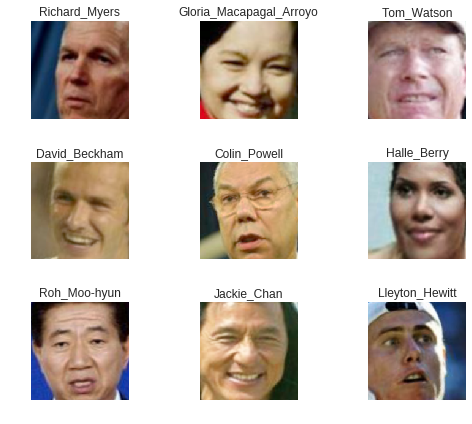

In [166]:
data.show_batch(rows=3, figsize=(7, 6))

In [0]:
# Let's start training!
learn = create_cnn(data, models.resnet18, metrics=error_rate)

In [168]:
learn.fit_one_cycle(30)

Total time: 18:54
epoch  train_loss  valid_loss  error_rate
1      7.456692    7.215441    0.988764    (00:39)
2      6.824711    6.712406    0.913858    (00:37)
3      6.134254    6.289051    0.910861    (00:37)
4      5.478613    6.006661    0.913858    (00:37)
5      4.889481    5.953006    0.931086    (00:37)
6      4.348804    5.907973    0.931086    (00:38)
7      3.805361    5.883251    0.925843    (00:37)
8      3.308832    5.892204    0.916105    (00:37)
9      2.822167    5.986739    0.920599    (00:37)
10     2.447888    6.342994    0.934082    (00:37)
11     2.005213    6.360252    0.923596    (00:37)
12     1.700999    6.485382    0.927341    (00:37)
13     1.453949    6.663860    0.925843    (00:37)
14     1.244879    6.762970    0.928090    (00:38)
15     1.087376    6.899058    0.933333    (00:37)
16     0.960961    7.235210    0.925843    (00:37)
17     0.846261    7.396747    0.927341    (00:37)
18     0.763657    7.125755    0.912360    (00:37)
19     0.670982    7.0

In [0]:
"""
Resnet34
Total time: 29:19
epoch  train_loss  valid_loss  error_rate
1      7.487374    7.246901    0.991760    (00:57)
2      6.913865    6.864163    0.935581    (00:58)
3      6.224117    6.531451    0.944569    (00:58)
4      5.544582    6.254720    0.943820    (00:58)
5      4.893483    6.131419    0.942322    (00:58)
6      4.253182    6.085640    0.940075    (00:58)
7      3.680361    6.018093    0.924345    (00:58)
8      3.059318    6.228754    0.933333    (00:58)
9      2.544743    6.297318    0.916105    (00:58)
10     2.046025    6.660730    0.925094    (00:59)
11     1.645560    6.704509    0.920599    (00:58)
12     1.307560    6.667736    0.910112    (00:58)
13     1.045572    6.869042    0.921348    (00:58)
14     0.877126    7.025184    0.918352    (00:58)
15     0.752575    7.145138    0.909363    (00:58)
16     0.640889    7.339399    0.923596    (00:58)
17     0.530928    7.437535    0.918352    (00:58)
18     0.472893    7.773446    0.931835    (00:58)
19     0.389183    7.980904    0.930337    (00:58)
20     0.353180    7.999830    0.934082    (00:58)
21     0.316892    7.824601    0.930337    (00:58)
22     0.275265    7.782232    0.931086    (00:58)
23     0.234118    7.745389    0.926592    (00:58)
24     0.220867    7.722384    0.928839    (00:59)
25     0.197039    7.731007    0.925843    (00:58)
26     0.182296    7.735313    0.931835    (00:58)
27     0.172894    7.711122    0.924345    (00:58)
28     0.167879    7.764463    0.931835    (00:59)
29     0.164305    7.783355    0.926592    (00:58)
30     0.156118    7.745248    0.928839    (00:58)
"""

In [151]:
"""
Resnet18
Total time: 26:53
epoch  train_loss  valid_loss  error_rate
1      7.516132    7.228721    0.989513    (00:54)
2      6.913618    6.726759    0.915356    (00:53)
3      6.164106    6.359039    0.913858    (00:53)
4      5.529391    6.264557    0.951311    (00:53)
5      4.917921    6.105565    0.953558    (00:53)
6      4.338018    6.079302    0.949813    (00:53)
7      3.758736    6.052692    0.937079    (00:53)
8      3.164248    5.990393    0.928090    (00:53)
9      2.665371    6.378747    0.949813    (00:53)
10     2.218538    6.284554    0.923596    (00:54)
11     1.806797    6.635651    0.943071    (00:53)
12     1.465584    6.905675    0.934082    (00:53)
13     1.238016    7.136137    0.938577    (00:53)
14     1.049924    6.888698    0.928090    (00:53)
15     0.901484    7.031662    0.931835    (00:54)
16     0.770319    7.055845    0.913858    (00:53)
17     0.669274    7.287471    0.933333    (00:53)
18     0.587226    7.062684    0.919850    (00:53)
19     0.516426    7.063058    0.913858    (00:54)
20     0.462627    7.084911    0.910861    (00:54)
21     0.411338    7.284415    0.922097    (00:53)
22     0.366351    7.227367    0.915356    (00:53)
23     0.337722    7.198548    0.913109    (00:54)
24     0.304312    7.064698    0.910861    (00:53)
25     0.289083    7.141039    0.910112    (00:54)
26     0.259780    7.132170    0.909363    (00:53)
27     0.251138    6.995394    0.904120    (00:53)
28     0.233035    7.063651    0.905618    (00:53)
29     0.234177    7.075295    0.908614    (00:53)
30     0.234049    7.066705    0.902622    (00:53)
"""

'\nTotal time: 26:53\nepoch  train_loss  valid_loss  error_rate\n1      7.516132    7.228721    0.989513    (00:54)\n2      6.913618    6.726759    0.915356    (00:53)\n3      6.164106    6.359039    0.913858    (00:53)\n4      5.529391    6.264557    0.951311    (00:53)\n5      4.917921    6.105565    0.953558    (00:53)\n6      4.338018    6.079302    0.949813    (00:53)\n7      3.758736    6.052692    0.937079    (00:53)\n8      3.164248    5.990393    0.928090    (00:53)\n9      2.665371    6.378747    0.949813    (00:53)\n10     2.218538    6.284554    0.923596    (00:54)\n11     1.806797    6.635651    0.943071    (00:53)\n12     1.465584    6.905675    0.934082    (00:53)\n13     1.238016    7.136137    0.938577    (00:53)\n14     1.049924    6.888698    0.928090    (00:53)\n15     0.901484    7.031662    0.931835    (00:54)\n16     0.770319    7.055845    0.913858    (00:53)\n17     0.669274    7.287471    0.933333    (00:53)\n18     0.587226    7.062684    0.919850    (00:53)\

In [0]:
learn.save('phase-1-18')

In [0]:
learn.load('phase-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

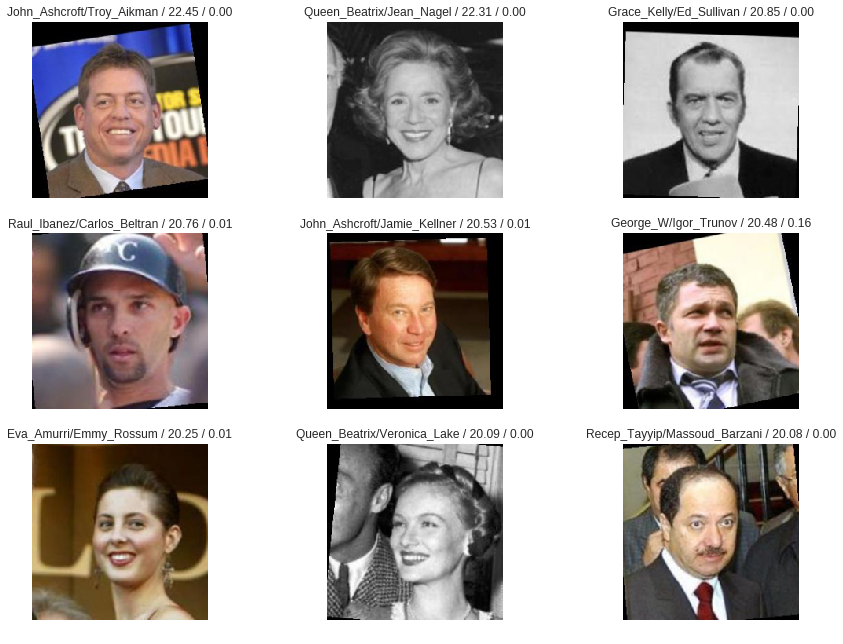

In [91]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
# crashed
# interp.most_confused(min_val=2)

In [0]:
# Fine tuning

In [0]:
learn.lr_find()

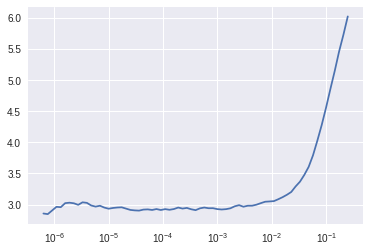

In [31]:
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate
1,1.394787,5.243755,0.584326


KeyboardInterrupt: ignored